In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn import *

In [3]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

In [5]:
heart=pd.read_csv(r"C:\Users\skula\Downloads\Heart disease\heart_disease.csv")


In [6]:
heart.head()

,Age,Gender,Blood Pressure,Cholesterol Level,Exercise Habits,Smoking,Family Heart Disease,Diabetes,BMI,High Blood Pressure,...,High LDL Cholesterol,Alcohol Consumption,Stress Level,Sleep Hours,Sugar Consumption,Triglyceride Level,Fasting Blood Sugar,CRP Level,Homocysteine Level,Heart Disease Status
0,56.0,Male,153.0,155.0,High,Yes,Yes,No,24.991591,Yes,...,No,High,Medium,7.633228,Medium,342.0,NaN,12.969246,12.387250,No
1,69.0,Female,146.0,286.0,High,No,Yes,Yes,25.221799,No,...,No,Medium,High,8.744034,Medium,133.0,157.0,9.355389,19.298875,No
2,46.0,Male,126.0,216.0,Low,No,No,No,29.855447,No,...,Yes,Low,Low,4.440440,Low,393.0,92.0,12.709873,11.230926,No
3,32.0,Female,122.0,293.0,High,Yes,Yes,No,24.130477,Yes,...,Yes,Low,High,5.249405,High,293.0,94.0,12.509046,5.961958,No
4,60.0,Male,166.0,242.0,Low,Yes,Yes,Yes,20.486289,Yes,...,No,Low,High,7.030971,High,263.0,154.0,10.381259,8.153887,No


In [7]:
heart.shape

(10000, 21)

In [8]:
heart.isnull().sum()

Age                     29
Gender                  19
Blood Pressure          19
Cholesterol Level       30
Exercise Habits         25
Smoking                 25
Family Heart Disease    21
Diabetes                30
BMI                     22
High Blood Pressure     26
Low HDL Cholesterol     25
High LDL Cholesterol    26
Alcohol Consumption     32
Stress Level            22
Sleep Hours             25
Sugar Consumption       30
Triglyceride Level      26
Fasting Blood Sugar     22
CRP Level               26
Homocysteine Level      20
Heart Disease Status     0
dtype: int64

In [7]:
heart.duplicated().sum()

0

In [8]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Age                   9971 non-null   float64
 1   Gender                9981 non-null   object 
 2   Blood Pressure        9981 non-null   float64
 3   Cholesterol Level     9970 non-null   float64
 4   Exercise Habits       9975 non-null   object 
 5   Smoking               9975 non-null   object 
 6   Family Heart Disease  9979 non-null   object 
 7   Diabetes              9970 non-null   object 
 8   BMI                   9978 non-null   float64
 9   High Blood Pressure   9974 non-null   object 
 10  Low HDL Cholesterol   9975 non-null   object 
 11  High LDL Cholesterol  9974 non-null   object 
 12  Alcohol Consumption   9968 non-null   object 
 13  Stress Level          9978 non-null   object 
 14  Sleep Hours           9975 non-null   float64
 15  Sugar Consumption   

In [12]:
col_int=heart.select_dtypes(include='float64')
col_int.columns

Index(['Age', 'Blood Pressure', 'Cholesterol Level', 'BMI', 'Sleep Hours',
       'Triglyceride Level', 'Fasting Blood Sugar', 'CRP Level',
       'Homocysteine Level'],
      dtype='object')

In [13]:
col_obj=heart.select_dtypes(include='object')
col_obj.columns


Index(['Gender', 'Exercise Habits', 'Smoking', 'Family Heart Disease',
       'Diabetes', 'High Blood Pressure', 'Low HDL Cholesterol',
       'High LDL Cholesterol', 'Alcohol Consumption', 'Stress Level',
       'Sugar Consumption', 'Heart Disease Status'],
      dtype='object')

In [14]:
for column in col_obj:
    heart[column] = heart[column].fillna(heart[column].mode()[0])

In [15]:
for column in col_int:
    heart[column] = heart[column].fillna(heart[column].mean())

In [16]:
heart.isnull().sum()

Age                     0
Gender                  0
Blood Pressure          0
Cholesterol Level       0
Exercise Habits         0
Smoking                 0
Family Heart Disease    0
Diabetes                0
BMI                     0
High Blood Pressure     0
Low HDL Cholesterol     0
High LDL Cholesterol    0
Alcohol Consumption     0
Stress Level            0
Sleep Hours             0
Sugar Consumption       0
Triglyceride Level      0
Fasting Blood Sugar     0
CRP Level               0
Homocysteine Level      0
Heart Disease Status    0
dtype: int64

In [17]:
heart= heart.drop(['High Blood Pressure', 'Low HDL Cholesterol', 'High LDL Cholesterol', 
              'Alcohol Consumption', 'Fasting Blood Sugar', 'Stress Level', 'Sleep Hours'], axis=1)

In [18]:
heart=heart.drop(['Sugar Consumption'], axis=1)

In [19]:
col_int=heart.select_dtypes(include='float64')
col_int.columns

Index(['Age', 'Blood Pressure', 'Cholesterol Level', 'BMI',
       'Triglyceride Level', 'CRP Level', 'Homocysteine Level'],
      dtype='object')

In [20]:
col_obj=heart.select_dtypes(include='object')
col_obj.columns

Index(['Gender', 'Exercise Habits', 'Smoking', 'Family Heart Disease',
       'Diabetes', 'Heart Disease Status'],
      dtype='object')

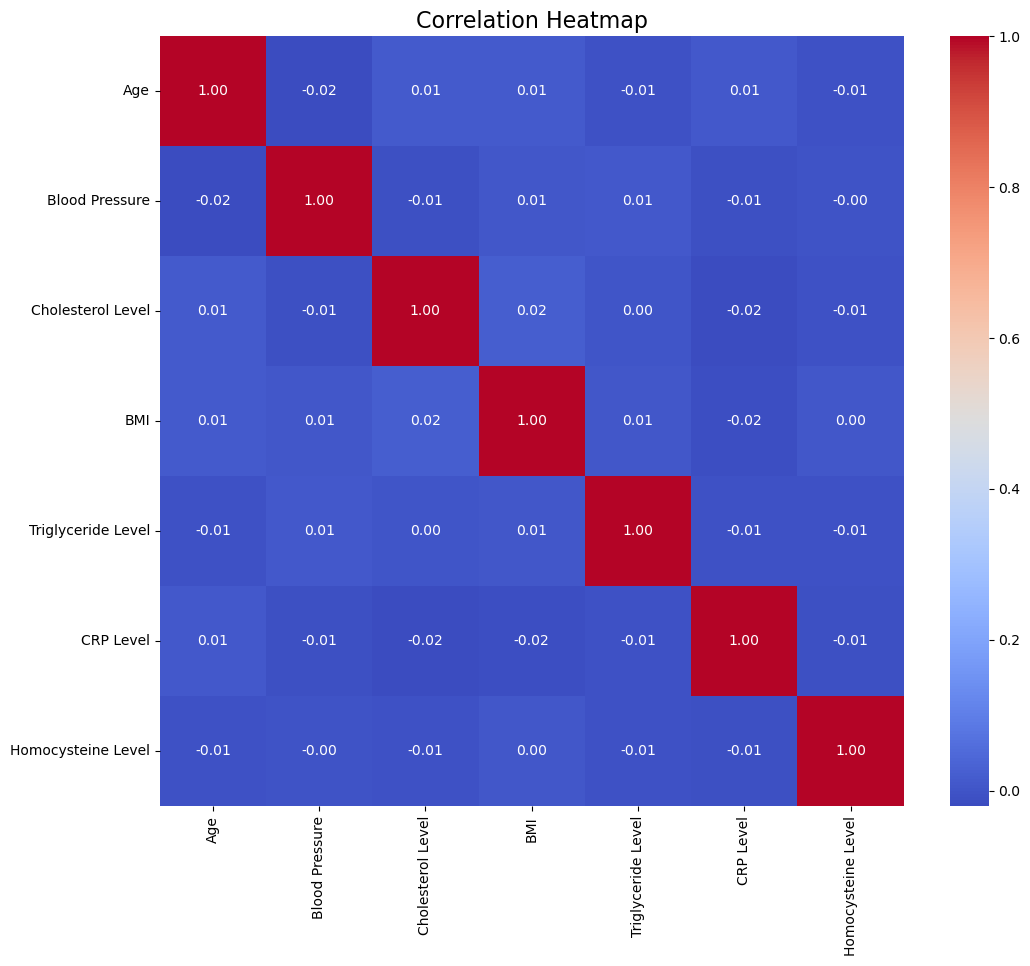

In [21]:
# Correlation map
correlation_matrix= heart.corr()
plt.figure(figsize=(12,10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Correlation Heatmap", fontsize=16)
plt.show()

In [22]:
from sklearn.preprocessing import LabelEncoder

In [23]:
colms=['Gender', 'Exercise Habits', 'Smoking', 'Family Heart Disease',
       'Diabetes', 'Heart Disease Status']
lb=LabelEncoder()
for col in colms:
    heart[col] = lb.fit_transform(heart[col])


In [24]:
x=heart.drop(['Heart Disease Status'], axis=1)
y=heart['Heart Disease Status']

In [25]:
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size=0.03, random_state=0)

In [26]:
# KNN Neighbours
knn_score=[]
for k in range(2, 21):
    knn_classifier = KNeighborsClassifier(n_neighbors=k)
    knn_classifier.fit(x_train.values, y_train.values)
    score = round(knn_classifier.score(x_test.values, y_test.values), 2)
    knn_score.append(score) 


In [27]:
knn_classifier= KNeighborsClassifier(n_neighbors=5)
knn_classifier.fit(x_train,y_train)
knn_score=knn_classifier.predict(x_test)
print(classification_report(y_test, knn_score))

              precision    recall  f1-score   support

           0       0.83      0.95      0.89       248
           1       0.24      0.08      0.12        52

    accuracy                           0.80       300
   macro avg       0.53      0.51      0.50       300
weighted avg       0.73      0.80      0.75       300



In [28]:
# Decision Tree
dt_scores= []
for i in range(1, len(x.columns)+1):
    dt_classifier = DecisionTreeClassifier(max_features=i, random_state=0 )
    dt_classifier.fit(x_train.values, y_train.values)
    dt_scores.append(round(dt_classifier.score(x_test.values, y_test.values),2))
print('Done')

Done


In [29]:
print(dt_scores)

[0.7, 0.65, 0.7, 0.72, 0.68, 0.71, 0.7, 0.67, 0.65, 0.74, 0.7, 0.7]


In [30]:
dt_classifier=DecisionTreeClassifier(max_features = 13, random_state =0)
dt_classifier.fit(x_train.values, y_train.values)

DecisionTreeClassifier(max_features=13, random_state=0)

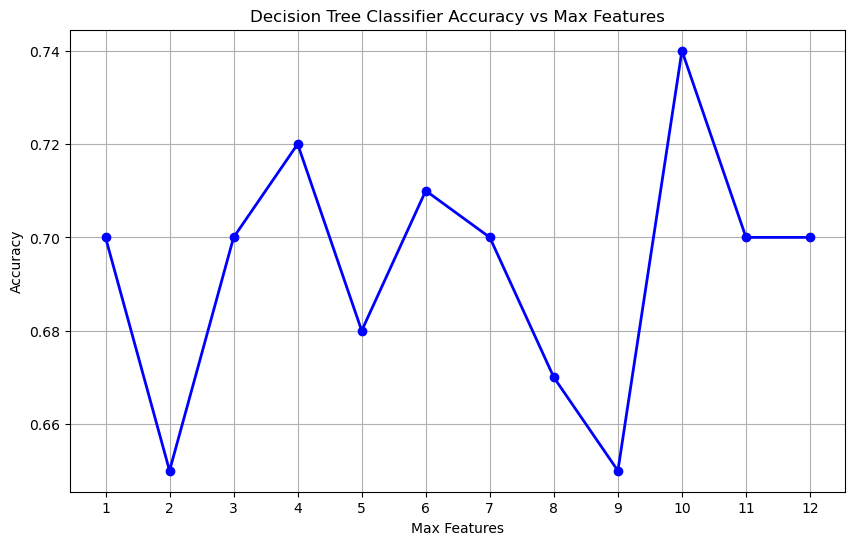

In [31]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(x.columns) + 1), dt_scores, marker='o', color='b', linestyle='-', linewidth=2, markersize=6)
plt.title('Decision Tree Classifier Accuracy vs Max Features')
plt.xlabel('Max Features')
plt.ylabel('Accuracy')
plt.xticks(range(1, len(x.columns) + 1))
plt.grid(True)
plt.show()

In [32]:
# Logistic Regression
log_model = LogisticRegression(random_state=42)
log_model.fit(x_train, y_train)
y_pred_log = log_model.predict(x_test)

In [33]:
print("\nLogistic Regression Results:")
print("Accuracy:", accuracy_score(y_test, y_pred_log))
print("Classification Report:")
print(classification_report(y_test, y_pred_log))


Logistic Regression Results:
Accuracy: 0.8266666666666667
Classification Report:
              precision    recall  f1-score   support

           0       0.83      1.00      0.91       248
           1       0.00      0.00      0.00        52

    accuracy                           0.83       300
   macro avg       0.41      0.50      0.45       300
weighted avg       0.68      0.83      0.75       300



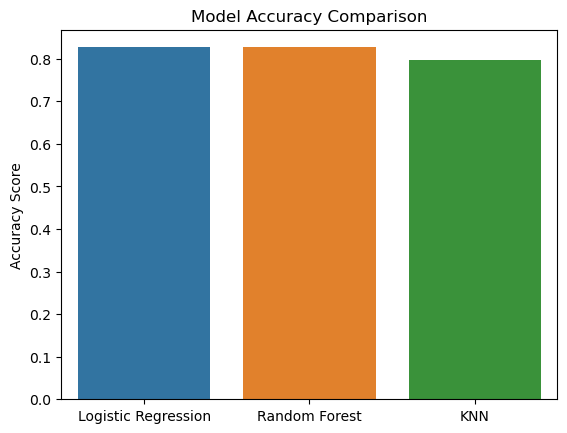

In [38]:
models = {'Logistic Regression': log_model, 'Random Forest': rf_model, 'KNN': knn_classifier}
scores = {name: accuracy_score(y_test, model.predict(x_test)) for name, model in models.items()}
sns.barplot(x=list(scores.keys()), y=list(scores.values()))
plt.title("Model Accuracy Comparison")
plt.ylabel("Accuracy Score")
plt.show()


In [35]:
# Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42, n_estimators=100)
rf_model.fit(x_train, y_train)
y_pred_rf = rf_model.predict(x_test)

print("\nRandom Forest Results:")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Classification Report:")
print(classification_report(y_test, y_pred_rf))


Random Forest Results:
Accuracy: 0.8266666666666667
Classification Report:
              precision    recall  f1-score   support

           0       0.83      1.00      0.91       248
           1       0.00      0.00      0.00        52

    accuracy                           0.83       300
   macro avg       0.41      0.50      0.45       300
weighted avg       0.68      0.83      0.75       300



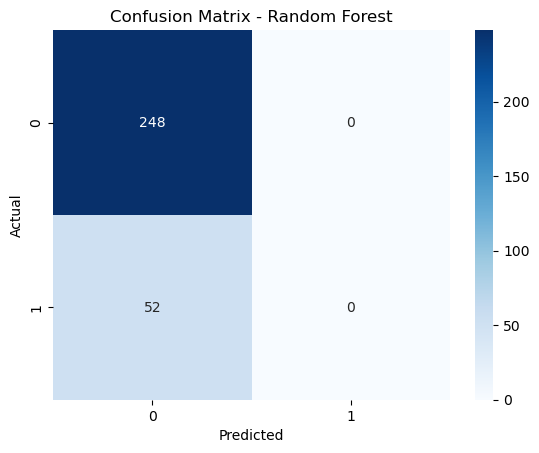

In [39]:
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix - Random Forest")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [40]:
import pickle

all_models = [rf_model, log_model, dt_classifier, knn_classifier]

with open("Heart Disease pre.pkl", "wb") as files:
    pickle.dump(all_models, files)  

print("Done")


Done


In [41]:
open_file= open("Heart Disease pre.pkl", 'rb')
loaded_list= pickle.load(open_file)
print(loaded_list)
open_file.close()
print("Done")

[RandomForestClassifier(random_state=42), LogisticRegression(random_state=42), DecisionTreeClassifier(max_features=13, random_state=0), KNeighborsClassifier()]
Done
